<a href="https://colab.research.google.com/github/Sanketr113/B.Tech-Project---Optimizing-Voice-Activity-Detection-with-Vision-Transformer-or-ViT/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone git@github.com/PratikAgrawal02/VAD.git

fatal: repository 'git@github.com/PratikAgrawal02/VAD.git' does not exist


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import os
import numpy as np
import librosa
import wave
import pylab
import matplotlib.pyplot as plt



import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

In [ ]:
os.curdir

'.'

In [ ]:
os.listdir(os.curdir)

['.config', 'BTP_VAD', 'sample_data']

In [ ]:
#read the data

base_dir = '/content/BTP_VAD/BTP!/data/'
dataset = []
labels = []

#ignore the .DS_Store file
for folder in os.listdir(base_dir):
    if folder == '.DS_Store':
        continue
    for file in os.listdir(os.path.join(base_dir, folder)):
        if file == '.DS_Store':
            continue
        image = cv2.imread(os.path.join(base_dir, folder, file), cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(os.path.join(base_dir, folder, file))
            continue
        dataset.append(image)
        # if(len(dataset)==2549):
        #     print(os.path.join(base_dir, folder, file))
        #     continue
        labels.append(folder)

In [ ]:
OUTPUT_DIR = '/content/BTP_VAD/BTP!/data/'
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 2

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=OUTPUT_DIR,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=OUTPUT_DIR,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 7463 files belonging to 2 classes.
Using 5971 files for training.
Found 7463 files belonging to 2 classes.
Using 1492 files for validation.


In [ ]:
# get labels from the dataset
class_names = train_dataset.class_names
class_names

['Class0', 'Class1']

In [ ]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    reshape = tf.keras.Sequential([tf.keras.layers.Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS))])

    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    ds = ds.map(lambda x, y: (reshape(x), y))


    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)


In [ ]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape= (IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
187/187 [==============================] - 58s 260ms/step - loss: 0.3818 - accuracy: 0.8481 - val_loss: 0.7097 - val_accuracy: 0.7272
Epoch 2/10
187/187 [==============================] - 50s 257ms/step - loss: 0.2787 - accuracy: 0.8774 - val_loss: 0.2738 - val_accuracy: 0.8901
Epoch 3/10
187/187 [==============================] - 50s 260ms/step - loss: 0.2628 - accuracy: 0.8871 - val_loss: 1.1914 - val_accuracy: 0.7534
Epoch 4/10
187/187 [==============================] - 50s 260ms/step - loss: 0.2436 - accuracy: 0.8960 - val_loss: 0.2658 - val_accuracy: 0.8733
Epoch 5/10
187/187 [==============================] - 50s 259ms/step - loss: 0.2293 - accuracy: 0.9059 - val_loss: 0.3707 - val_accuracy: 0.8351
Epoch 6/10
187/187 [==============================] - 50s 257ms/step - loss: 0.2006 - accuracy: 0.9188 - val_loss: 0.2686 - val_accuracy: 0.8928
Epoch 7/10
187/187 [==============================] - 49s 252ms/step - loss: 0.1900 - accuracy: 0.9216 - val_loss: 0.3448 - val_ac

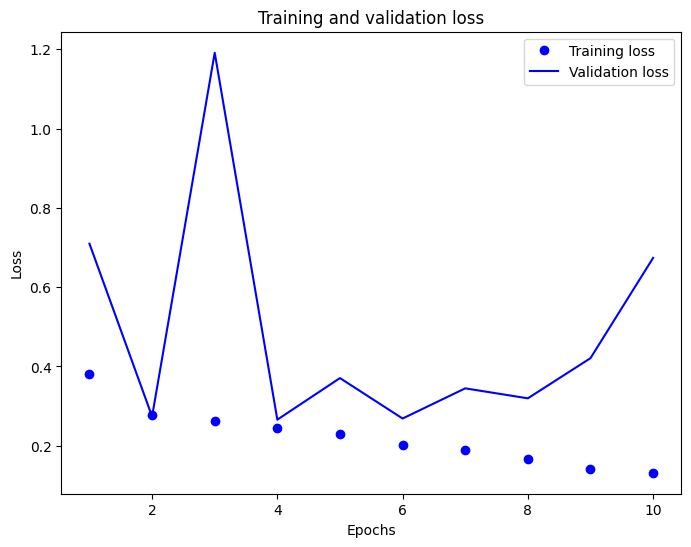

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# save the model
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#read images from folder and resize them to 600, 1000, 3
folder='/content/BTP_VAD/test/'
images = []
for filename in os.listdir(folder):
    # img = Image.open(os.path.join(folder,filename))
    img = cv2.imread(os.path.join(folder,filename))
    # if img is not None:
        # img = img.resize((1000,600))
    img = np.array(img)
    images.append(img)
images = np.array(images)
images.shape


(324, 600, 1000, 3)

In [ ]:
images[0].shape

(600, 1000, 3)

In [ ]:
#resize to 256, 256, 3
images = tf.image.resize(images, [256, 256])
images.shape

TensorShape([324, 256, 256, 3])

11/11 [==============================] - 1s 51ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


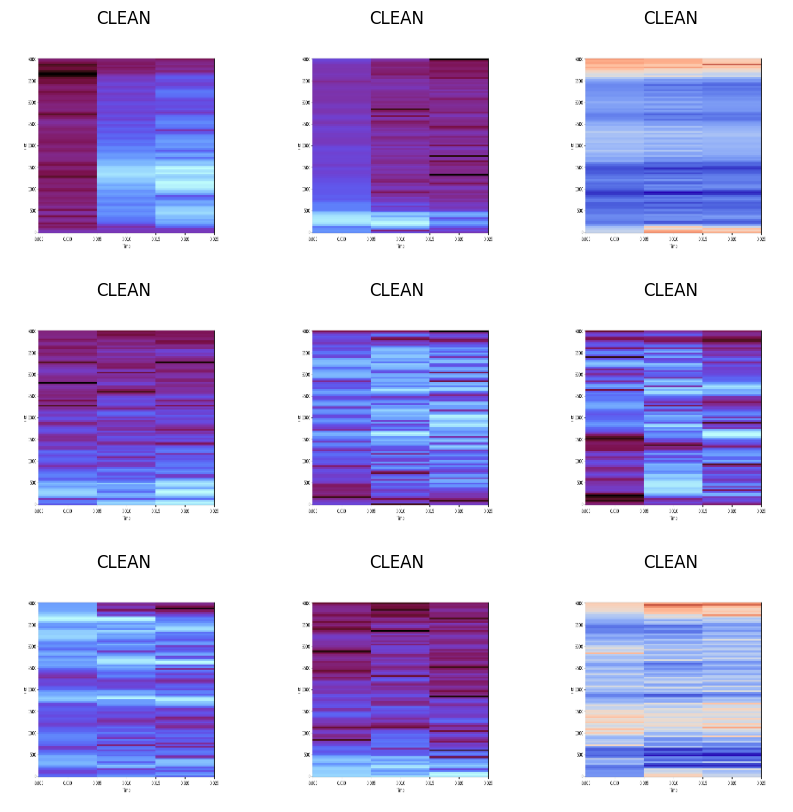

In [ ]:
predictions = model.predict(images)
predictions = np.argmax(predictions, axis=1)
print(predictions)

class_names = ['NOISY', 'CLEAN']

# plot the predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")


In [ ]:
folder='/content/BTP_VAD/BTP!/data/Class0/'
image=cv2.imread(folder+'spec_0.png')
image.shape

(600, 1000, 3)

In [ ]:
image = tf.image.resize(image, [256, 256])
image.shape

TensorShape([256, 256, 3])

In [ ]:
#reshape to 1, 256, 256, 3
image = np.reshape(image, (1, 256, 256, 3))
image.shape

(1, 256, 256, 3)

1/1 [==============================] - 0s 260ms/step
[1]


(-0.5, 255.5, 255.5, -0.5)

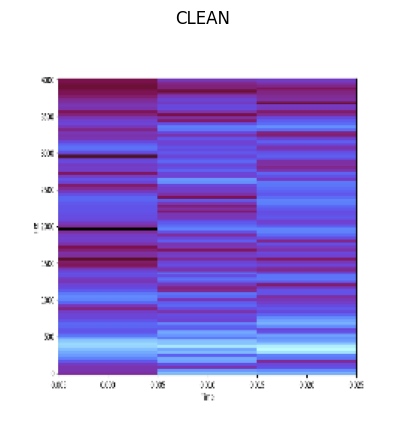

In [ ]:
# predict
predictions = model.predict(image)
predictions = np.argmax(predictions, axis=1)
print(predictions)

# plot the predictions
plt.figure(figsize=(5, 5))
plt.imshow(image.reshape(256, 256, 3).astype("uint8"))
plt.title(class_names[predictions[0]])
plt.axis("off")